In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate
import scipy.optimize
import pandas as pd

In [47]:
headers = pd.read_csv('../data/statistics.txt', delim_whitespace=True, nrows=0).columns[1:]
stats = pd.read_csv('../data/statistics.txt', delim_whitespace=True, header=None, skiprows=1, names=headers)

display(stats)

# a numpy array of efficiency as a function of step size
efficiency = 1 / (1 + 2 * np.sum(stats.iloc[:, 2:].to_numpy(), axis=1))

,Stepsize,Acceptance,k=1,k=2,k=3,k=4,k=5,k=6,k=7,k=8,...,k=40,k=41,k=42,k=43,k=44,k=45,k=46,k=47,k=48,k=49
0,0.01,0.996762,0.999935,0.999870,0.999805,0.999740,0.999675,0.999610,0.999545,0.999480,...,0.997409,0.997345,0.997280,0.997216,0.997151,0.997087,0.997023,0.996958,0.996893,0.996828
1,0.02,0.993063,0.999755,0.999510,0.999265,0.999020,0.998774,0.998529,0.998284,0.998039,...,0.990140,0.989895,0.989651,0.989408,0.989164,0.988921,0.988679,0.988435,0.988192,0.987950
2,0.03,0.989745,0.999546,0.999094,0.998641,0.998189,0.997737,0.997284,0.996830,0.996377,...,0.981907,0.981458,0.981009,0.980560,0.980113,0.979666,0.979219,0.978771,0.978323,0.977874
3,0.04,0.986682,0.999242,0.998486,0.997730,0.996973,0.996216,0.995462,0.994708,0.993952,...,0.970244,0.969524,0.968804,0.968082,0.967361,0.966640,0.965922,0.965202,0.964483,0.963764
4,0.05,0.982194,0.998727,0.997456,0.996189,0.994924,0.993662,0.992403,0.991147,0.989892,...,0.950529,0.949321,0.948118,0.946919,0.945723,0.944530,0.943339,0.942151,0.940969,0.939788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,4.96,0.229973,0.744813,0.557111,0.418162,0.314082,0.237677,0.181006,0.137912,0.104857,...,0.000219,-0.000652,-0.000629,-0.000547,-0.001023,-0.001801,-0.002399,-0.002871,-0.003273,-0.002749
496,4.97,0.229761,0.746126,0.558742,0.420537,0.316902,0.239555,0.182531,0.139178,0.105858,...,-0.000314,-0.000357,0.000234,-0.000273,-0.000809,-0.000796,-0.001115,-0.001741,-0.001272,-0.000676
497,4.98,0.229131,0.744588,0.556627,0.417849,0.315570,0.238899,0.181772,0.139264,0.106343,...,0.000010,0.000425,0.000402,0.000747,0.000982,0.000871,0.000601,0.000634,0.000975,0.000837
498,4.99,0.228462,0.746013,0.558098,0.418661,0.315412,0.239055,0.181678,0.137731,0.104491,...,0.002741,0.002250,0.001819,0.000994,0.000598,0.000705,0.000693,0.000650,0.000531,0.000451


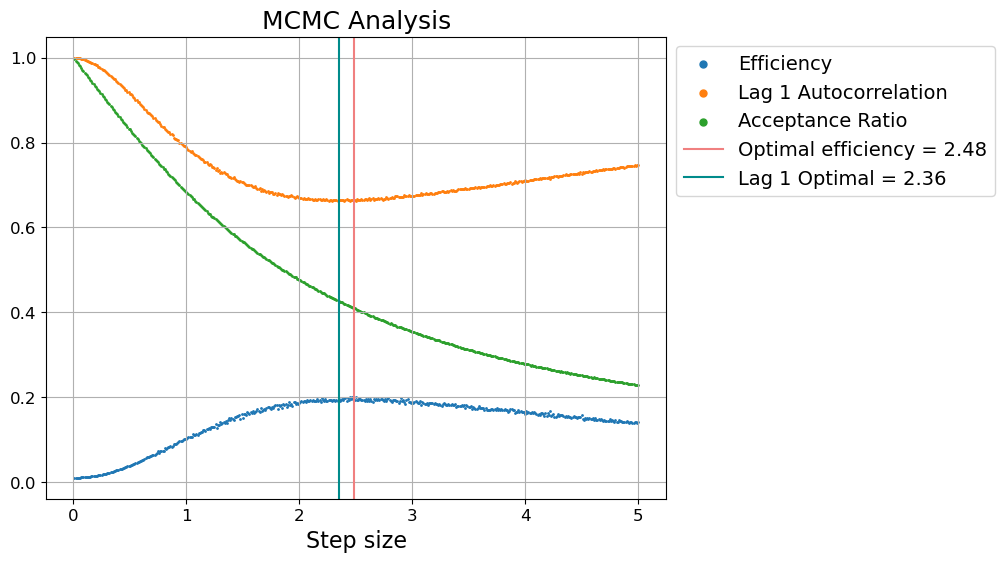

In [46]:
def poly(x, a, b, c, d, e, f):
    return a + b * x + c * x ** 2 + d * x ** 3 + e * x ** 4 + f * x ** 5

popt, pcov = scipy.optimize.curve_fit(poly, stats['Stepsize'], efficiency)
opteffstepsize = scipy.optimize.minimize(lambda x : -poly(x, *popt), 2, bounds=[(min(stats['Stepsize']), max(stats['Stepsize']))])['x'][0]

popt, pcov = scipy.optimize.curve_fit(poly, stats['Stepsize'], stats['k=1'])
optk1stepsize = scipy.optimize.minimize(lambda x : poly(x, *popt), 2, bounds=[(min(stats['Stepsize']), max(stats['Stepsize']))])['x'][0]


fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(stats['Stepsize'], efficiency, s=1, label='Efficiency')
ax.scatter(stats['Stepsize'], stats['k=1'], s=1, label='Lag 1 Autocorrelation')
ax.scatter(stats['Stepsize'], stats['Acceptance'], s=1, label='Acceptance Ratio')

ax.axvline(opteffstepsize, c='lightcoral', label='Optimal efficiency = {:.2f}'.format(opteffstepsize))
ax.axvline(optk1stepsize, c='darkcyan', label='Lag 1 Optimal = {:.2f}'.format(optk1stepsize))

ax.set_xlabel('Step size', fontsize=16)
ax.set_title('MCMC Analysis', fontsize=18)

ax.tick_params(axis='both', labelsize=12)

ax.grid()
legend = ax.legend(fontsize=14, markerscale=5, bbox_to_anchor = (1, 1))

#fig.savefig('../results/r2WS_2.0_0.54.png', dpi=400, bbox_inches='tight', facecolor='white', transparent=False)

plt.show()

### Distributions

We can also look at the distribution that MCMC generated for a specific step size

In [50]:
def pdf(r):
    if (r <= 0):
        return 0
    else:
        return r * r / (1 + np.exp((r - 2) / 0.54))
    
area = scipy.integrate.quad(pdf, 0, 20)[0]

def pdf(r):
    return np.where(r < 0, 0, (r * r / (1 + np.exp((r - 2) / 0.54))) * 1 / area)

def ReadStepSizeFile(stepsize):
    data = pd.read_csv('../data/samples_' + str(stepsize) + '.txt', delim_whitespace=True, header=None)
    
    return data

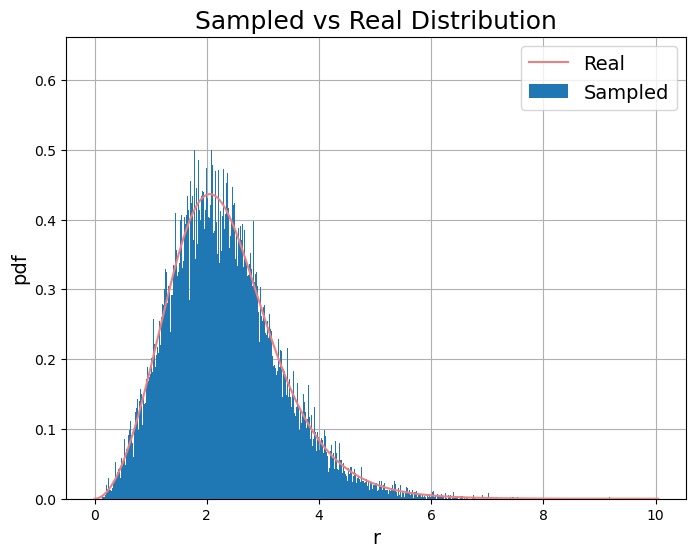

In [49]:
data = ReadStepSizeFile(250)

(bars, lims) = np.histogram(data[0], bins=int(data.shape[0] / 100), density=True)
centers = np.convolve(lims, np.ones(2) / 2, mode='valid')
binWidth = centers[1] - centers[0]


fig, ax = plt.subplots(figsize=(8, 6))

x = np.linspace(min(0, np.min(lims)), max(6, np.max(lims)), 1000)
y = pdf(x)

ax.bar(centers, bars, width=binWidth, zorder=9, label='Sampled')
ax.plot(x, y, zorder=10, c='lightcoral', label='Real')

ax.set_xlabel('r', fontsize = 14)
ax.set_ylabel('pdf', fontsize = 14)
ax.set_title('Sampled vs Real Distribution', fontsize = 18)

ax.grid()
ax.legend(fontsize = 14)

plt.show()